In [1]:
grid_min = 0.01
grid_max = 0.99
grid_num = 500
alpha = 0.9

/var/folders/87/z8v2_f0n6ss6sbvw7g9cs1gc0000gq/T/ipykernel_68659/3938959920.py:7: RuntimeWarning: invalid value encountered in sqrt
  term2 = np.sqrt(term1**2 - 4 * l2 * (1 - alpha))


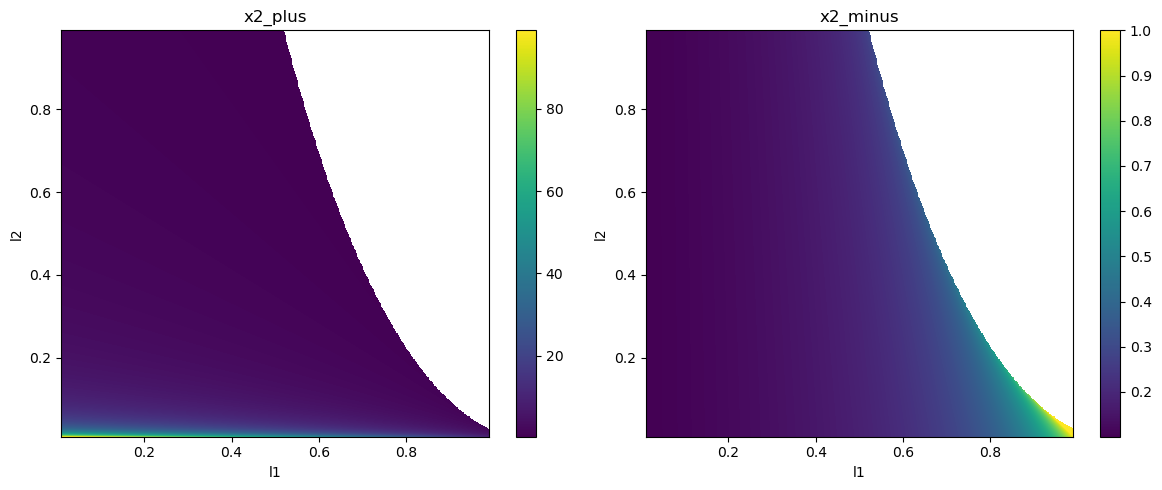

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate x_2
def calculate_x2(l1, l2, alpha=0.5):
    term1 = 1 - alpha * l1 + (1 - alpha) * l2
    term2 = np.sqrt(term1**2 - 4 * l2 * (1 - alpha))
    x2_plus = (term1 + term2) / (2 * l2)
    x2_minus = (term1 - term2) / (2 * l2)
    return x2_plus, x2_minus

# Create a 2x2 grid of l1 and l2
l1_values = np.linspace(grid_min, grid_max, grid_num)  # Adjust the range if needed
l2_values = np.linspace(grid_min, grid_max, grid_num)  # Adjust the range if needed
l1_grid, l2_grid = np.meshgrid(l1_values, l2_values)

# Calculate x2 for each pair of l1 and l2
x2_plus_grid = np.zeros_like(l1_grid)
x2_minus_grid = np.zeros_like(l1_grid)

for i in range(l1_grid.shape[0]):
    for j in range(l1_grid.shape[1]):
        l1 = l1_grid[i, j]
        l2 = l2_grid[i, j]
        x2_plus, x2_minus = calculate_x2(l1, l2, alpha)
        x2_plus_grid[i, j] = x2_plus
        x2_minus_grid[i, j] = x2_minus

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot x2_plus
im1 = ax[0].imshow(x2_plus_grid, extent=(l1_values.min(), l1_values.max(), l2_values.min(), l2_values.max()), origin='lower', aspect='auto')
ax[0].set_title("x2_plus")
ax[0].set_xlabel("l1")
ax[0].set_ylabel("l2")
fig.colorbar(im1, ax=ax[0])

# Plot x2_minus
im2 = ax[1].imshow(x2_minus_grid, extent=(l1_values.min(), l1_values.max(), l2_values.min(), l2_values.max()), origin='lower', aspect='auto', vmax=1)
ax[1].set_title("x2_minus")
ax[1].set_xlabel("l1")
ax[1].set_ylabel("l2")
fig.colorbar(im2, ax=ax[1])

plt.tight_layout()
plt.show()

In [3]:
# Calculate numerical derivatives
dx2_dl1 = np.gradient(x2_plus_grid, l1_values, axis=1)  # Partial derivative w.r.t. l1
dx2_dl2 = np.gradient(x2_plus_grid, l2_values, axis=0)  # Partial derivative w.r.t. l2

# Calculate numerical derivatives
dx2_dl1_minus = np.gradient(x2_minus_grid, l1_values, axis=1)  # Partial derivative w.r.t. l1
dx2_dl2_minus = np.gradient(x2_minus_grid, l2_values, axis=0)  # Partial derivative w.r.t. l2


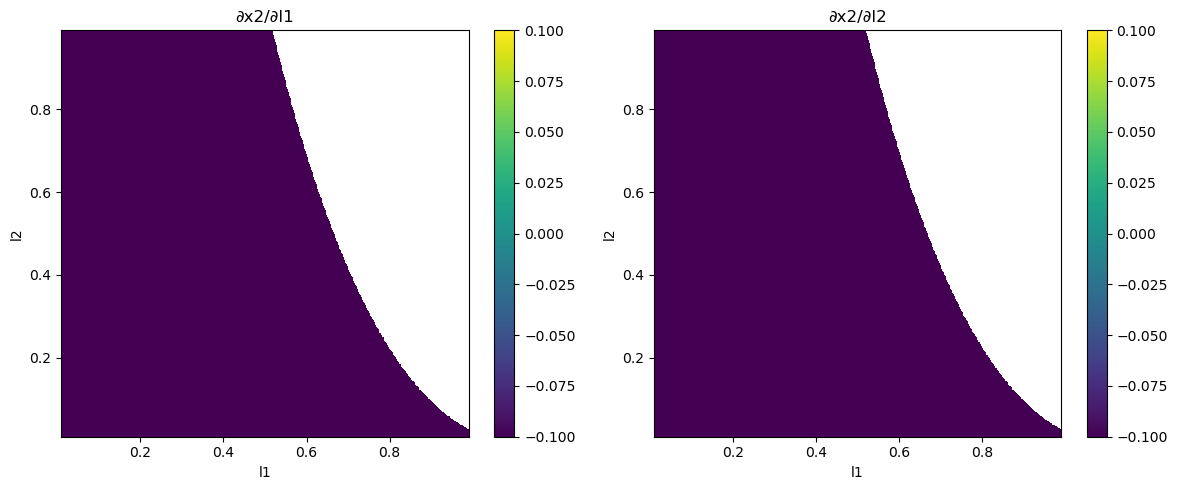

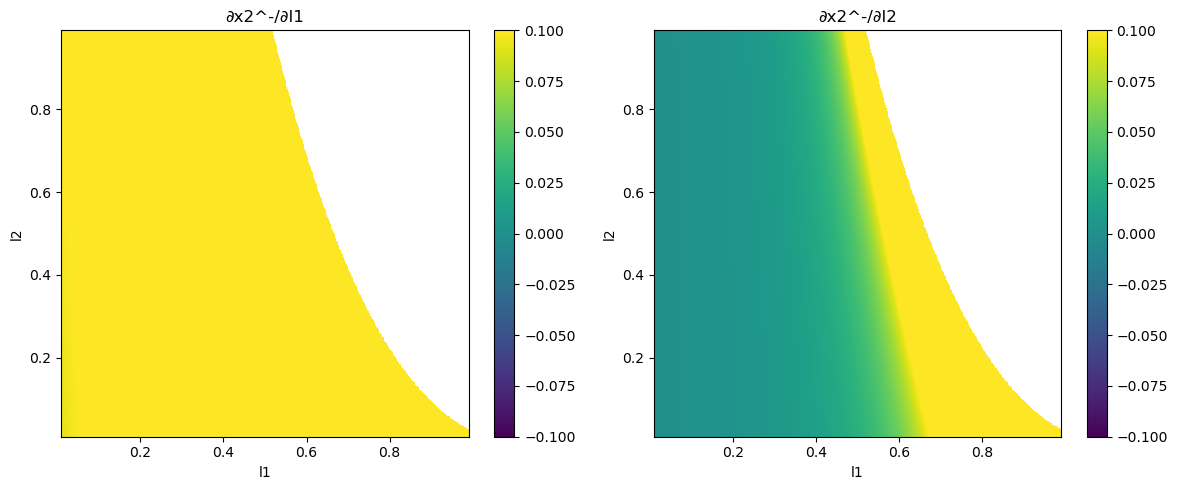

In [4]:
# Plot the derivatives
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Derivative w.r.t. l1
im1 = ax[0].imshow(dx2_dl1, extent=(l1_values.min(), l1_values.max(), l2_values.min(), l2_values.max()), origin='lower', aspect='auto', vmin=-0.1, vmax=0.1)
ax[0].set_title("∂x2/∂l1")
ax[0].set_xlabel("l1")
ax[0].set_ylabel("l2")
fig.colorbar(im1, ax=ax[0])

# Derivative w.r.t. l2
im2 = ax[1].imshow(dx2_dl2, extent=(l1_values.min(), l1_values.max(), l2_values.min(), l2_values.max()), origin='lower', aspect='auto', vmin=-0.1, vmax=0.1)
ax[1].set_title("∂x2/∂l2")
ax[1].set_xlabel("l1")
ax[1].set_ylabel("l2")
fig.colorbar(im2, ax=ax[1])

plt.tight_layout()
plt.show()



# Plot the derivatives
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Derivative w.r.t. l1
im1 = ax[0].imshow(dx2_dl1_minus, extent=(l1_values.min(), l1_values.max(), l2_values.min(), l2_values.max()), origin='lower', aspect='auto', vmin=-0.1, vmax=0.1)
ax[0].set_title("∂x2^-/∂l1")
ax[0].set_xlabel("l1")
ax[0].set_ylabel("l2")
fig.colorbar(im1, ax=ax[0])

# Derivative w.r.t. l2
im2 = ax[1].imshow(dx2_dl2_minus, extent=(l1_values.min(), l1_values.max(), l2_values.min(), l2_values.max()), origin='lower', aspect='auto', vmin=-0.1, vmax=0.1)
ax[1].set_title("∂x2^-/∂l2")
ax[1].set_xlabel("l1")
ax[1].set_ylabel("l2")
fig.colorbar(im2, ax=ax[1])

plt.tight_layout()
plt.show()

In [5]:
print("Partial derivative of x2_plus w.r.t. l1 is Positive?", np.all(dx2_dl1[~np.isnan(dx2_dl1)] > 0))
print("Partial derivative of x2_plus w.r.t. l2 is Positive?", np.all(dx2_dl2[~np.isnan(dx2_dl2)] > 0))
print("Partial derivative of x2_minus w.r.t. l1 is Positive?", np.all(dx2_dl1_minus[~np.isnan(dx2_dl1_minus)] > 0))
print("Partial derivative of x2_minus w.r.t. l2 is Positive?", np.all(dx2_dl2_minus[~np.isnan(dx2_dl2_minus)] > 0))

Partial derivative of x2_plus w.r.t. l1 is Positive? False
Partial derivative of x2_plus w.r.t. l2 is Positive? False
Partial derivative of x2_minus w.r.t. l1 is Positive? True
Partial derivative of x2_minus w.r.t. l2 is Positive? True


In [6]:
print("Partial derivative of x2_plus w.r.t. l1 is Negative?", np.all(dx2_dl1[~np.isnan(dx2_dl1)] < 0))
print("Partial derivative of x2_plus w.r.t. l2 is Negative?", np.all(dx2_dl2[~np.isnan(dx2_dl2)] < 0))
print("Partial derivative of x2_minus w.r.t. l1 is Negative?", np.all(dx2_dl1_minus[~np.isnan(dx2_dl1_minus)] < 0))
print("Partial derivative of x2_minus w.r.t. l2 is Negative?", np.all(dx2_dl2_minus[~np.isnan(dx2_dl2_minus)] < 0))

Partial derivative of x2_plus w.r.t. l1 is Negative? True
Partial derivative of x2_plus w.r.t. l2 is Negative? True
Partial derivative of x2_minus w.r.t. l1 is Negative? False
Partial derivative of x2_minus w.r.t. l2 is Negative? False


/var/folders/87/z8v2_f0n6ss6sbvw7g9cs1gc0000gq/T/ipykernel_68659/250298382.py:7: RuntimeWarning: invalid value encountered in sqrt
  term2 = np.sqrt(term1**2 - 4 * l2 * (1 - alpha))


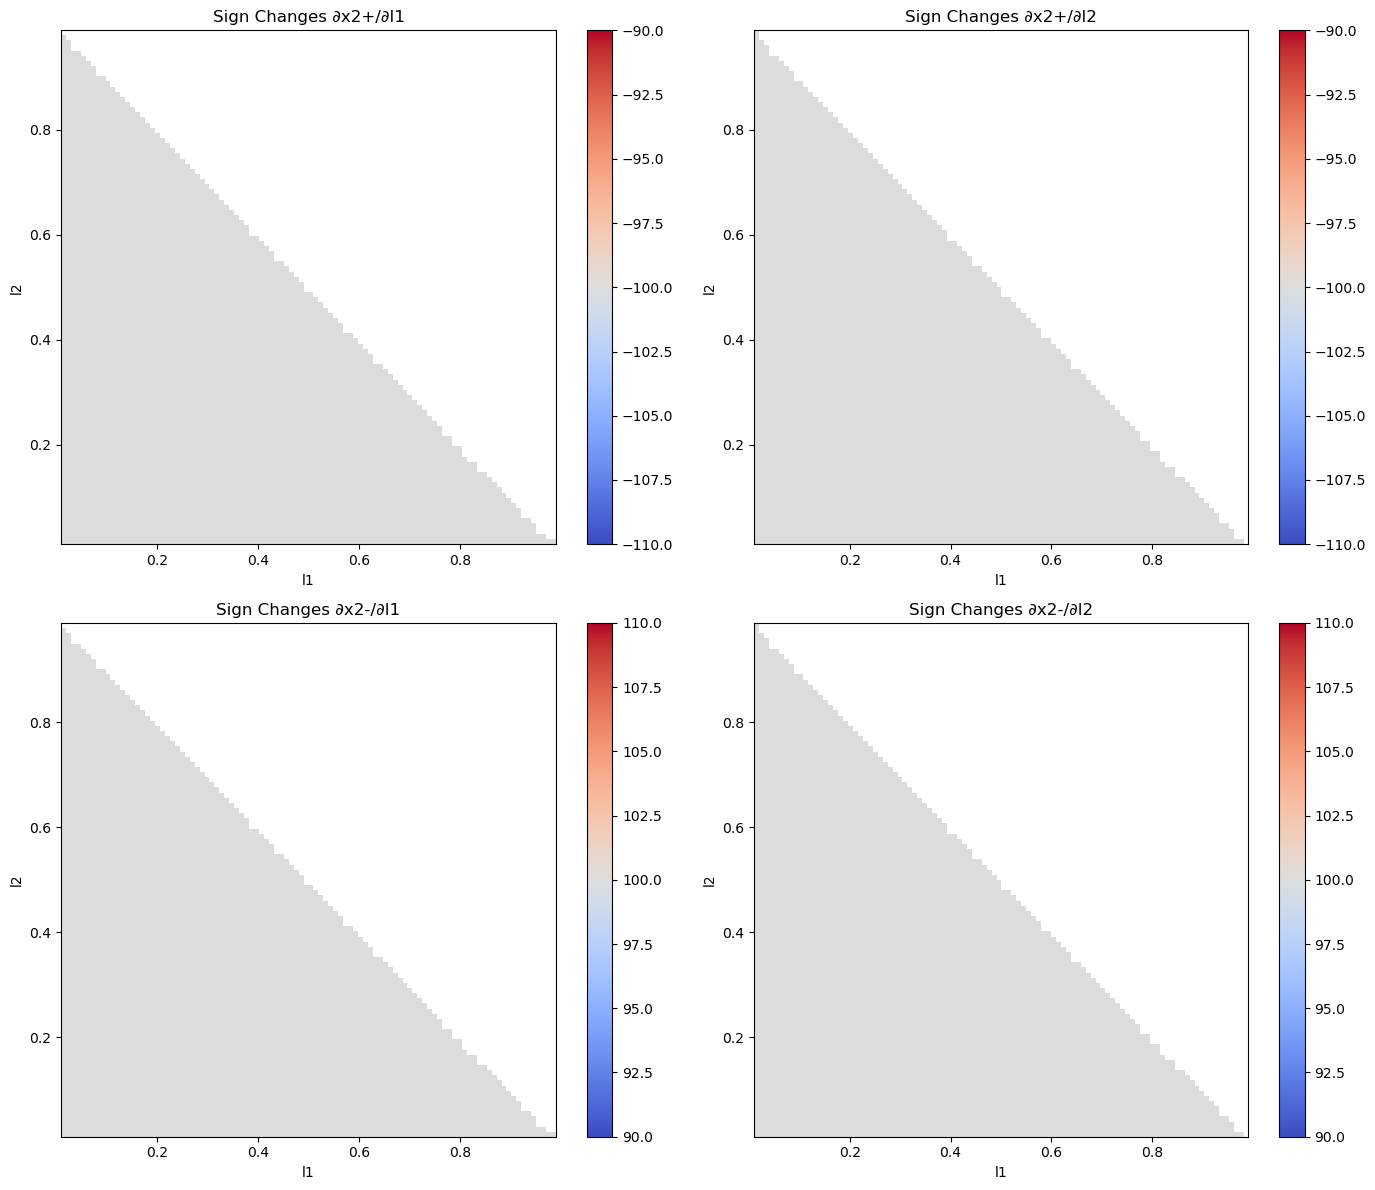

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate x_2
def calculate_x2(l1, l2, alpha):
    term1 = 1 - alpha * l1 + (1 - alpha) * l2
    term2 = np.sqrt(term1**2 - 4 * l2 * (1 - alpha))
    x2_plus = (term1 + term2) / (2 * l2)
    x2_minus = (term1 - term2) / (2 * l2)
    return x2_plus, x2_minus

# Create the l1-l2 grid
grid_min = 0.01
grid_max = 0.99
grid_num = 100
l1_values = np.linspace(grid_min, grid_max, grid_num)
l2_values = np.linspace(grid_min, grid_max, grid_num)
l1_grid, l2_grid = np.meshgrid(l1_values, l2_values)

# Create alpha values for sensitivity analysis
alpha_values = np.linspace(0.01, 0.99, 100)

# Initialize arrays to track sign changes
sign_changes_dl1_plus = np.zeros((grid_num, grid_num))
sign_changes_dl2_plus = np.zeros((grid_num, grid_num))
sign_changes_dl1_minus = np.zeros((grid_num, grid_num))
sign_changes_dl2_minus = np.zeros((grid_num, grid_num))

# Perform sensitivity analysis
for alpha in alpha_values:
    x2_plus_grid = np.zeros_like(l1_grid)
    x2_minus_grid = np.zeros_like(l1_grid)

    for i in range(l1_grid.shape[0]):
        for j in range(l1_grid.shape[1]):
            l1 = l1_grid[i, j]
            l2 = l2_grid[i, j]
            x2_plus, x2_minus = calculate_x2(l1, l2, alpha)
            x2_plus_grid[i, j] = x2_plus
            x2_minus_grid[i, j] = x2_minus

    # Calculate numerical derivatives
    dx2_dl1_plus = np.gradient(x2_plus_grid, l1_values, axis=1)  # Partial w.r.t. l1
    dx2_dl2_plus = np.gradient(x2_plus_grid, l2_values, axis=0)  # Partial w.r.t. l2
    dx2_dl1_minus = np.gradient(x2_minus_grid, l1_values, axis=1)  # Partial w.r.t. l1
    dx2_dl2_minus = np.gradient(x2_minus_grid, l2_values, axis=0)  # Partial w.r.t. l2

    # Track sign changes
    sign_changes_dl1_plus += np.sign(dx2_dl1_plus)
    sign_changes_dl2_plus += np.sign(dx2_dl2_plus)
    sign_changes_dl1_minus += np.sign(dx2_dl1_minus)
    sign_changes_dl2_minus += np.sign(dx2_dl2_minus)

# Visualize results as heatmaps
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Heatmaps for x2_plus derivatives
im1 = ax[0, 0].imshow(sign_changes_dl1_plus, extent=(grid_min, grid_max, grid_min, grid_max), origin='lower', aspect='auto', cmap='coolwarm')
ax[0, 0].set_title("Sign Changes ∂x2+/∂l1")
ax[0, 0].set_xlabel("l1")
ax[0, 0].set_ylabel("l2")
fig.colorbar(im1, ax=ax[0, 0])

im2 = ax[0, 1].imshow(sign_changes_dl2_plus, extent=(grid_min, grid_max, grid_min, grid_max), origin='lower', aspect='auto', cmap='coolwarm')
ax[0, 1].set_title("Sign Changes ∂x2+/∂l2")
ax[0, 1].set_xlabel("l1")
ax[0, 1].set_ylabel("l2")
fig.colorbar(im2, ax=ax[0, 1])

# Heatmaps for x2_minus derivatives
im3 = ax[1, 0].imshow(sign_changes_dl1_minus, extent=(grid_min, grid_max, grid_min, grid_max), origin='lower', aspect='auto', cmap='coolwarm')
ax[1, 0].set_title("Sign Changes ∂x2-/∂l1")
ax[1, 0].set_xlabel("l1")
ax[1, 0].set_ylabel("l2")
fig.colorbar(im3, ax=ax[1, 0])

im4 = ax[1, 1].imshow(sign_changes_dl2_minus, extent=(grid_min, grid_max, grid_min, grid_max), origin='lower', aspect='auto', cmap='coolwarm')
ax[1, 1].set_title("Sign Changes ∂x2-/∂l2")
ax[1, 1].set_xlabel("l1")
ax[1, 1].set_ylabel("l2")
fig.colorbar(im4, ax=ax[1, 1])

plt.tight_layout()
plt.show()